In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.DataFrame( {'experience': [1,2,4,  3,7,9,  5,10],
                    'salary':      [3,4,5,  5,5,9,  9,12]})
df1

,experience,salary
0,1,3
1,2,4
2,4,5
3,3,5
4,7,5
5,9,9
6,5,9
7,10,12


In [4]:
X = df1.drop('salary', axis=1)
y = df1['salary']

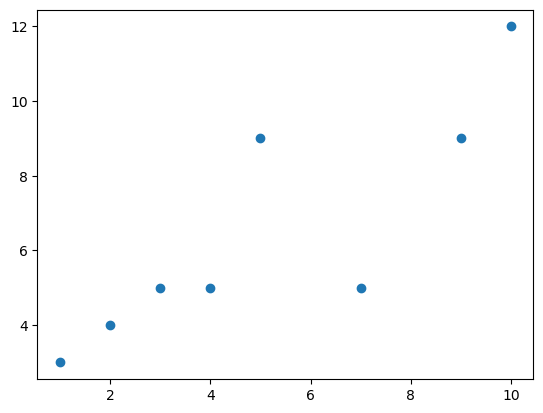

In [5]:
plt.scatter(X.experience, y)

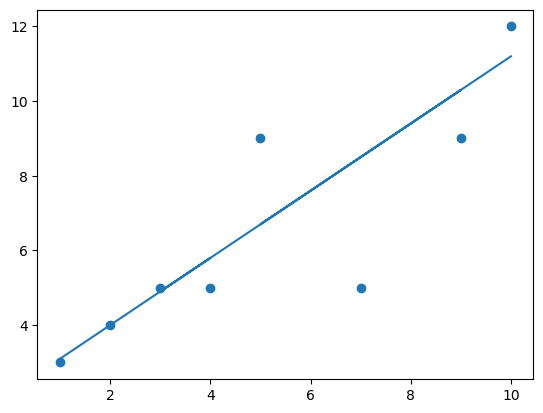

In [6]:
# Manually try different lines (Practically not needed)
b0 = 2.2
b1 = 0.9

y_pred = b0 + b1*X.experience

plt.scatter(X.experience, y)
plt.plot(X.experience, y_pred)
plt.show()

In [7]:
# Manually calculate b0 and b1 (Practically not needed once we learn to 
# build a model) 
x_bar = np.mean(X.experience)
y_bar = np.mean(y)

num = np.sum( (X.experience - x_bar) * (y - y_bar) )
denom = np.sum( (X.experience - x_bar)**2 )

b1 = num/denom
b0 = y_bar - b1*x_bar
print('b1:', b1)
print('b0:', b0)

b1: 0.8080133555926544
b0: 2.358931552587646


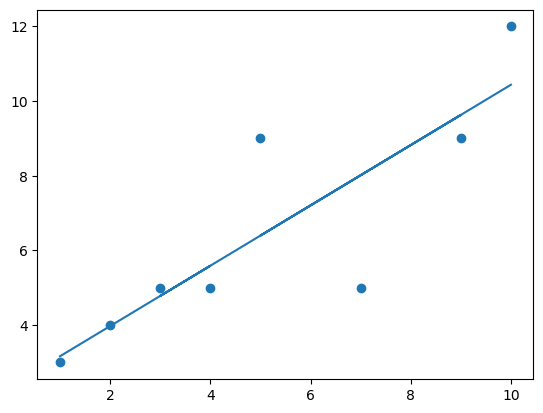

In [8]:
# Draw the best-fit line
y_pred = b0 + b1*X.experience

plt.scatter(X.experience, y)
plt.plot(X.experience, y_pred)
plt.show()

In [9]:
# Build Linear Regression model using Statsmodels

In [10]:
import statsmodels.api as sm

In [12]:
Xc = sm.add_constant(X)
Xc

,const,experience
0,1.0,1
1,1.0,2
2,1.0,4
3,1.0,3
4,1.0,7
5,1.0,9
6,1.0,5
7,1.0,10


In [13]:
# Build model using OLS
ols_model = sm.OLS(y, Xc).fit()
ols_model.summary()

C:\Users\praka\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     15.34
Date:                Sat, 03 Jun 2023   Prob (F-statistic):            0.00783
Time:                        23:47:09   Log-Likelihood:                -14.836
No. Observations:                   8   AIC:                             33.67
Df Residuals:                       6   BIC:                             33.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3589      1.231      1.916      0.104      -0.654       5.372
experience     0.8080      0.206      3.917      0.008       0.303       1.313
==============================================================================
Omnibus:                        1.065   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.065
Skew:                          -0.219   Prob(JB):                        0.968
Kurtosis:                       2.947   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
np.corrcoef(X.experience, y)[0,1]**2

0.7188942354905234

In [15]:
# Get Predicted y


In [16]:
# Method 1
y_pred = ols_model.params[0] + ols_model.params[1]*X.experience
y_pred

0     3.166945
1     3.974958
2     5.590985
3     4.782972
4     8.015025
5     9.631052
6     6.398998
7    10.439065
Name: experience, dtype: float64

In [17]:
# Method 2
y_pred = ols_model.predict(Xc)
y_pred

0     3.166945
1     3.974958
2     5.590985
3     4.782972
4     8.015025
5     9.631052
6     6.398998
7    10.439065
dtype: float64

In [18]:
# Method 3
y_pred = ols_model.fittedvalues
y_pred

0     3.166945
1     3.974958
2     5.590985
3     4.782972
4     8.015025
5     9.631052
6     6.398998
7    10.439065
dtype: float64

In [19]:
# Manually calculate R2
SST = np.sum( (y - y_bar)**2 )
print('SST', SST)

SSR = np.sum( (y_pred - y_bar)**2 )
print('SSR', SSR)

SSE = np.sum( (y - y_pred)**2 )
print('SSE', SSE)

SST 68.0
SSR 48.88480801335565
SSE 19.115191986644398


In [20]:
SSR + SSE

68.00000000000006

In [21]:
# Calculate R2
r2 = SSR/SST
print('R2', r2)

R2 0.7188942354905243


In [22]:
# Calculate Adj R2
n=8
k=1
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)
adj_r2

0.6720432747389451

In [23]:
# Manually calculate f_stat

In [24]:
f_stat = (SSR / k) / (SSE / (n-k-1))
f_stat

15.34427947598256

In [25]:
### Calculate t stat and p_value

In [26]:
t_stat = 0.8080 / 0.206
t_stat

3.922330097087379

In [27]:
import scipy.stats as stats

In [28]:
p_value = 2 * stats.t.sf(t_stat, df=8-2)
p_value

0.007781095985285506

In [29]:
## Compute Residuals (Error)

In [30]:
y - y_pred

0   -0.166945
1    0.025042
2   -0.590985
3    0.217028
4   -3.015025
5   -0.631052
6    2.601002
7    1.560935
dtype: float64

In [31]:
ols_model.resid

0   -0.166945
1    0.025042
2   -0.590985
3    0.217028
4   -3.015025
5   -0.631052
6    2.601002
7    1.560935
dtype: float64